In [1]:
#importing required libraries

import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#importing MNIST dataset into my notebook from keras' repository

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
#viewing the dimensions of the data and target sets( of training set)

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [4]:
#viewing the dimensions of the data and target sets( of testing set)

print('Training Data: {}'.format(x_test.shape))
print('Training Labels: {}'.format(y_test.shape))

Training Data: (10000, 28, 28)
Training Labels: (10000,)


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


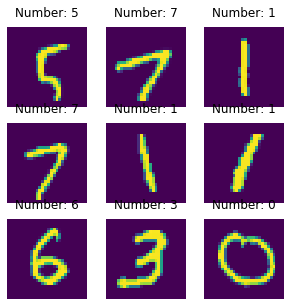

In [5]:
# creating figures with matplotlib.pyplot

fig, axs = plt.subplots(3, 3, figsize = (5, 5))

#looping through all the subplots and all the images from mnist dataset

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[100 + i])
    ax.axis('off')
    ax.set_title('Number: {}'.format(y_train[100 + i]))
    

#displaying the figure 

fig.show()

In [6]:
# convert each of the image into a one dimensional array

X = x_train.reshape(len(x_train), -1)
Y = y_train

In [7]:
X[0] #viewing

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
# converting each of the image into a one dimensional array

X = x_train.reshape(len(x_train), -1)
Y = y_train

# normalising the data from 0 to 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)
print(X[0])

(60000, 784)
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [9]:
from sklearn.cluster import MiniBatchKMeans  # to implement kmeans using mini-batch

n_digits = len(np.unique(y_test))
print(n_digits)

# Initializing KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fitting the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [10]:
kmeans.labels_[:20]

array([4, 8, 1, 3, 5, 0, 7, 4, 7, 2, 4, 3, 9, 6, 7, 2, 0, 3, 6, 2])

In [11]:
def infer_cluster_labels(kmeans, actual_labels):
    
    #this function block associates the most probable label with each cluster in my kmeans model
    #the function block also returns a list[dictionary actually] of clusters assigned to each label
    

    inferred_labels = {}  #stating dictionary in python

    for i in range(kmeans.n_clusters):

        # finding the index of points in cluster
        
        labels = []
        index = np.where(kmeans.labels_ == i)

        # appending or filling actual labels for each point in cluster
        
        labels.append(actual_labels[index])

        # determining most common label
        
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0]) #bincount counts the number of elements
        else:
            counts = np.bincount(np.squeeze(labels))

        # assigning the cluster to a value in the inferred_labels' dictionary
        
        if np.argmax(counts) in inferred_labels:  # appending the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else: # creatong a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels  

In [12]:
def infer_data_labels(X_labels, cluster_labels):
    #this function block determines label for each array, depending on the cluster i has been assigned to.
    #returns the predicted labels for each array or set
    
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)   # empty array of len(X)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [13]:
# testing the two functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[8 0 4 1 7 2 1 8 1 7 8 1 3 6 1 7 2 1 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [14]:
from sklearn import metrics #to quantify the quality of predictions

def calculate_metrics(estimator, data, labels):

    # to Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))  #spread of the cluster ,,comparing performance 
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [15]:
clusters = [10, 16, 36, 64, 144, 256, 400]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # printing cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determining predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculating and printing accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))
    
    #Inertia is the sum of squared errors for each cluster.
    #The smaller the inertia the denser the cluster.
    #homogeneity means each cluster contains only members of a single class.

Number of Clusters: 10
Inertia: 2381651.0030149333
Homogeneity: 0.45466893708406037
Accuracy: 0.5558333333333333

Number of Clusters: 16
Inertia: 2198818.633779695
Homogeneity: 0.5584902631781066
Accuracy: 0.6540833333333333

Number of Clusters: 36
Inertia: 1960599.1532010902
Homogeneity: 0.682688138700994
Accuracy: 0.7595166666666666

Number of Clusters: 64
Inertia: 1808583.5255222307
Homogeneity: 0.7378496763660919
Accuracy: 0.82

Number of Clusters: 144
Inertia: 1633151.3997553806
Homogeneity: 0.7982103844826957
Accuracy: 0.8619666666666667

Number of Clusters: 256
Inertia: 1517417.442927316
Homogeneity: 0.8420383996706925
Accuracy: 0.8990166666666667



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1561: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1561: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1561: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


Number of Clusters: 400
Inertia: 1434127.9400376012
Homogeneity: 0.8591000115486865
Accuracy: 0.9053166666666667



In [16]:
# testing kmeans algorithm on testing dataset
# converting each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalizing the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initializing and fitting KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)  #400 takes more time and does nothing better in accuracy 
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predicting labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculating and printing accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.9054

